In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

from statsmodels.tsa.stattools import adfuller
from pyramid.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

In [0]:
#pip install pyramid-arima

In [0]:
data = pd.read_csv('/content/drive/My Drive/ColabDataset/FinalInternatioalDataset.csv')

In [0]:
size=(19,9)
prophetData = data[['InvoiceDate','AvgNetFare']]

In [5]:
data.head(10)

,InvoiceDate,AvgNetFare,TotalNetFare
0,2018-04-01,18090.000000,54270.0
1,2018-04-02,18090.000000,0.0
2,2018-04-03,18090.000000,0.0
3,2018-04-04,18090.000000,0.0
4,2018-04-05,17610.333333,52831.0
5,2018-04-06,13392.166667,80353.0
6,2018-04-07,14550.500000,116404.0
7,2018-04-08,13936.000000,13936.0
8,2018-04-09,13936.000000,0.0
9,2018-04-10,13936.000000,0.0


In [0]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

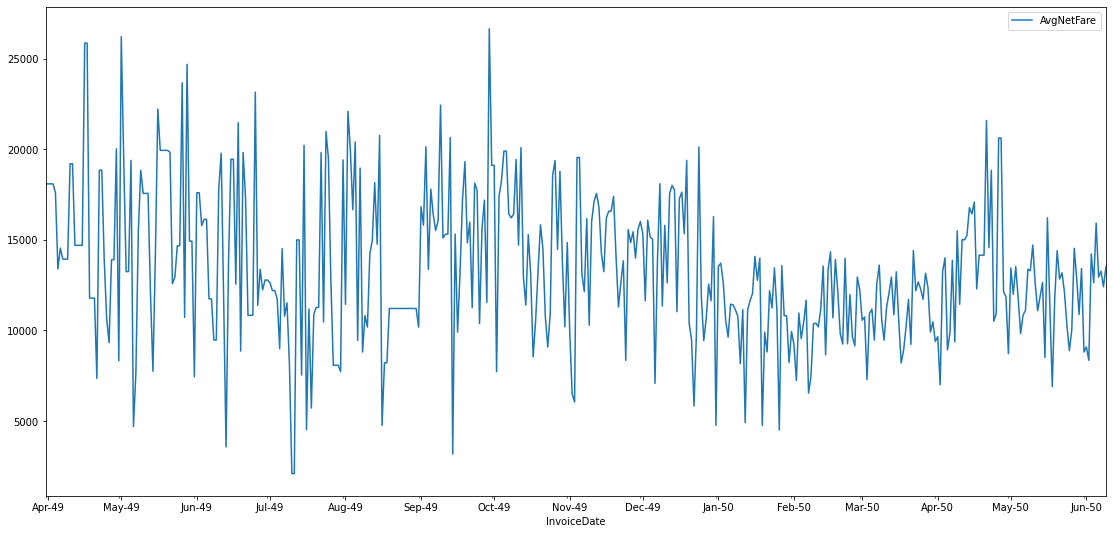

In [7]:
ax = data.plot(x='InvoiceDate',y='AvgNetFare',figsize=size)

ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%b-%y'))

In [0]:
data.set_index('InvoiceDate',inplace=True)

In [9]:
def DickeyFullerTest(val):
  ad = adfuller(val['AvgNetFare'])

  print('Crictical Value -   ',ad[0])
  print('P Value -   ',ad[1])
  print('No. of Lag Used -   ',ad[2])
  print('No. of value used -   ',ad[3])

  for key,val in ad[4].items():
    print(key,val)

  if(ad[1]>=0.05):
    print('Data is not Stationary')
  else:
    print('Data is Stationary')

DickeyFullerTest(data)

Crictical Value -    -3.5953242626895694
P Value -    0.00585104956337497
No. of Lag Used -    9
No. of value used -    426
1% -3.4457939940402107
5% -2.8683485906158963
10% -2.570396746236417
Data is Stationary


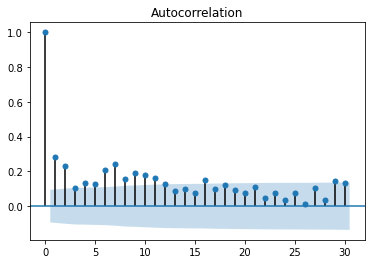

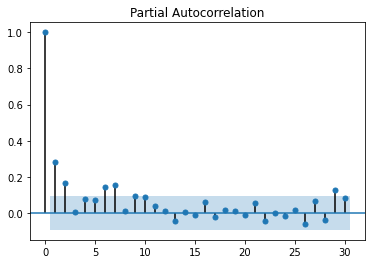

In [10]:
plot_acf(data['AvgNetFare'],lags=30)


plot_pacf(data['AvgNetFare'],lags=30)

plt.show()

In [0]:
# x = data['AvgNetFare'].diff(1)

# plt.plot(x)

# x.dropna(inplace=True)

# xTrain,xTest = x[:406],x[406:]

# x, x_diff = df['A'].iloc[0], df['B'].iloc[1:]
# df['C'] = np.r_[x, x_diff].cumsum().astype(int)

In [0]:
xTrain,xTest = data['AvgNetFare'][:406],data['AvgNetFare'][406:]

In [13]:
arima = ARIMA(xTrain,order=(1,0,1))
arima = arima.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             AvgNetFare   No. Observations:                  406
Model:                     ARMA(1, 1)   Log Likelihood               -3935.827
Method:                       css-mle   S.D. of innovations           3923.252
Date:                Tue, 16 Jun 2020   AIC                           7879.654
Time:                        12:49:53   BIC                           7895.679
Sample:                    04-01-2018   HQIC                          7885.996
                         - 05-11-2019                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.355e+04    698.950     19.381      0.000    1.22e+04    1.49e+04
ar.L1.AvgNetFare     0.9608      0.026     36.352      0.000       0.909       1.013
ma.L1.AvgNetFare    -0.8535      0.052    -16.295      0.000      -0.956      -0.751
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0408           +0.0000j            1.0408            0.0000
MA.1            1.1716           +0.0000j            1.1716            0.0000
-----------------------------------------------------------------------------
"""

In [14]:
pred = arima.forecast(steps=len(xTest))

print(mean_squared_error(xTest,pred[0]))
print(np.sqrt(mean_squared_error(xTest,pred[0])))

6819384.928496832
2611.395207259298


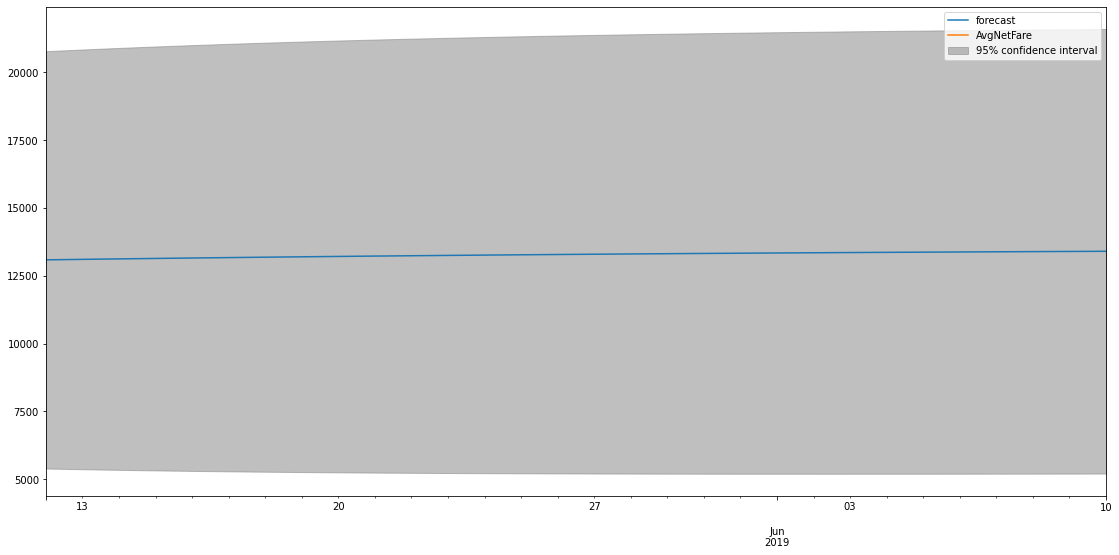

In [15]:
ax=arima.plot_predict(start='2019-05-12' , end='2019-06-10')
ax.set_figheight(9)
ax.set_figwidth(19)

In [16]:
auto = auto_arima(xTrain,start_p=0,start_q=0,d=0,max_d=9,max_p=30,end_q=30,
                  start_P=0,start_Q=0,D=0,max_P=30,max_Q=30,max_D=30,
                  trace=True)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7930.743, BIC=7938.756, Fit time=0.031 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7899.895, BIC=7911.914, Fit time=0.028 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=7909.591, BIC=7921.610, Fit time=0.052 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7890.556, BIC=7906.582, Fit time=0.104 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=7892.557, BIC=7912.589, Fit time=0.136 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=7894.552, BIC=7918.590, Fit time=0.233 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=7892.552, BIC=7912.584, Fit time=0.118 seconds
Total fit time: 0.706 seconds


In [0]:
auto = auto.fit(xTrain)
pred = auto.predict(len(xTest))

In [18]:
mean_squared_error(xTest,pred)
np.sqrt(mean_squared_error(xTest,pred))

2736.675865774724

In [0]:
sar = SARIMAX(xTrain,order=(10,0,4),seasonal_order=(10,2,0,7))
sar= sar.fit()

In [48]:
pred = sar.forecast(steps=len(xTest))

print(mean_squared_error(xTest,pred))
print(np.sqrt(mean_squared_error(xTest,pred)))

14230189.994115323
3772.29240570178


Let use Deep Neural Network

In [21]:
from keras.layers import Dense,LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [0]:
xTrain = np.array(xTrain).reshape(-1,1)
xTest = np.array(xTest).reshape(-1,1)

In [0]:
scaler = StandardScaler()
scaledTrain = scaler.fit_transform(xTrain)
scaledTest = scaler.fit_transform(xTest)

In [0]:
length= 20
batch = 1

In [0]:
trainGen = TimeseriesGenerator(scaledTrain,scaledTrain,length=length,batch_size=batch)
testGen = TimeseriesGenerator(scaledTest,scaledTest,length=length,batch_size=batch)

In [0]:
model = Sequential()

model.add(LSTM(10,activation='relu',input_shape=(length,1)))
#model.add(Dense(50,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [0]:
call = EarlyStopping(patience=4,monitor='val_loss',verbose=0)

In [28]:
model.fit_generator(trainGen,validation_data=testGen,epochs=100,callbacks=[call])

Epoch 1/100
386/386 [==============================] - 3s 9ms/step - loss: 0.9385 - val_loss: 0.2324
Epoch 2/100
386/386 [==============================] - 3s 7ms/step - loss: 0.8733 - val_loss: 0.3317
Epoch 3/100
386/386 [==============================] - 3s 7ms/step - loss: 0.8713 - val_loss: 0.3251
Epoch 4/100
386/386 [==============================] - 3s 7ms/step - loss: 0.8634 - val_loss: 0.3318
Epoch 5/100
386/386 [==============================] - 3s 7ms/step - loss: 0.8618 - val_loss: 0.2926


In [0]:
his = pd.DataFrame(model.history.history)

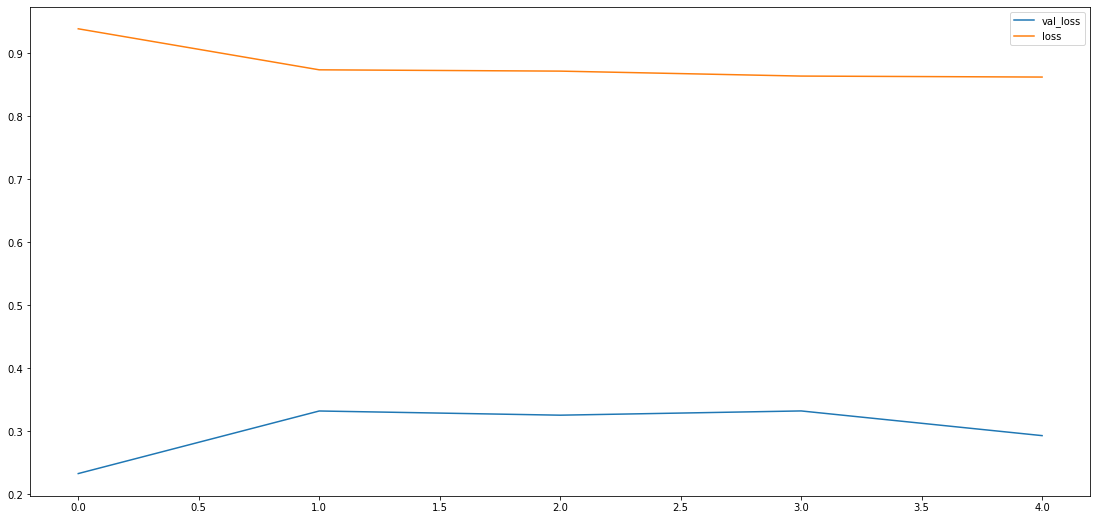

In [30]:
his.plot(figsize=size)

In [0]:
pred = list()
train = np.array(scaledTrain[-length:]).reshape((1,length,batch))

for x in range(len(xTest)):
  i = model.predict(train)[0]
  pred.append(i)

  train = np.append(train[:,1:,:],[[i]],axis=1)

In [32]:
newpred = scaler.inverse_transform(pred)
newpred

array([[11585.361 ],
       [11502.056 ],
       [11466.797 ],
       [11429.687 ],
       [11407.948 ],
       [11387.022 ],
       [11351.54  ],
       [11314.815 ],
       [11297.999 ],
       [11284.167 ],
       [11279.582 ],
       [11263.543 ],
       [11250.328 ],
       [11233.891 ],
       [11221.499 ],
       [11214.969 ],
       [11209.558 ],
       [11204.194 ],
       [11191.89  ],
       [11179.945 ],
       [11161.21  ],
       [11150.8955],
       [11141.587 ],
       [11132.675 ],
       [11124.303 ],
       [11116.538 ],
       [11109.201 ],
       [11102.308 ],
       [11095.879 ],
       [11089.741 ]], dtype=float32)

In [33]:
np.sqrt(mean_squared_error(xTest,newpred))

2350.329497907131

In [34]:
xTest

array([[12567.95238095],
       [11089.83672727],
       [11871.67636364],
       [12645.26572   ],
       [ 8504.02975   ],
       [16215.8282    ],
       [11312.45151905],
       [ 6900.05      ],
       [11759.98431111],
       [14403.65433962],
       [12837.32745098],
       [13179.720746  ],
       [12110.31305085],
       [10287.42013889],
       [ 8889.57142857],
       [10020.38125636],
       [14533.14545455],
       [12895.08615385],
       [10880.51372549],
       [13418.28571429],
       [ 8810.19858077],
       [ 9086.7829    ],
       [ 8346.41154848],
       [14220.86585366],
       [12629.12125   ],
       [15922.4673913 ],
       [12941.01766667],
       [13275.04340426],
       [12409.71428571],
       [13507.44836667]])

Facebook Prophet

In [0]:
from fbprophet import Prophet

In [0]:
prophetData.columns = ['ds','y']

xTrain,xTest = prophetData.iloc[:406],prophetData.iloc[406:]

In [0]:
prop = Prophet(growth='linear',seasonality_mode='multiplicative',daily_seasonality=True,
               changepoint_range=0.001,)

In [38]:
prop.fit(xTrain)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using -1.


In [0]:
predict = prop.make_future_dataframe(periods=30,freq='D')

In [0]:
forecast = prop.predict(predict)

In [41]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-04-01,14820.458472,9520.469341,19863.686005
1,2018-04-02,15899.520679,10847.358712,21111.201371
2,2018-04-03,15794.678432,10807.447273,21092.068582
3,2018-04-04,15368.891823,10233.048573,20649.558482
4,2018-04-05,15214.565713,9970.932237,20292.873134
...,...,...,...,...
431,2019-06-06,11348.648370,6266.345188,16622.227393
432,2019-06-07,10887.698448,6000.141593,15840.093666
433,2019-06-08,11246.589114,5871.155323,16013.437838
434,2019-06-09,11002.035889,5896.602708,16099.353593


In [0]:
pred = forecast['yhat'][406:]

In [43]:
np.sqrt(mean_squared_error(xTest['y'],pred))

2301.438016434454